In [6]:
#PODSUMOWANIE wszystkich 4 modeli

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import shap
import ipywidgets as widgets
from IPython.display import display


def save_model(model, path):
    with open(path, 'wb') as f:
        pickle.dump(model, f)

def load_model(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def evaluate_models(models_paths, X_test, y_test, threshold=0.5):
    results = []
    
    for path in models_paths:
        name = path.split("/")[-1].split(".")[0]
        model = load_model(path)
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            'Model': name,
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC': auc,
            'Confusion Matrix': cm
        })

    # Wyświetl metryki w tabeli
    df_results = pd.DataFrame([{k: v for k, v in r.items() if k != 'Confusion Matrix'} for r in results])
    display(df_results.sort_values('Recall', ascending=False))

    # Rysuj confusion matrix dla każdego modelu
    for res in results:
        print(f"\n📊 Confusion Matrix: {res['Model']}")
        plt.figure(figsize=(4, 3))
        sns.heatmap(res['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f"{res['Model']}")
        plt.tight_layout()
        plt.show()


In [8]:
"""
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0
import os
os._exit(00)
"""

'\n!pip uninstall -y scikit-learn imbalanced-learn\n!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0\nimport os\nos._exit(00)\n'

In [9]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

def random_undersample(X, y, random_state=42):
    rus = RandomUnderSampler(random_state=random_state)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

def random_oversample(X, y, random_state=42):
    ros = RandomOverSampler(random_state=random_state)
    X_res, y_res = ros.fit_resample(X, y)
    return X_res, y_res

def apply_smote(X, y, random_state=42, k_neighbors=5):
    smote = SMOTE(random_state=random_state, k_neighbors=k_neighbors)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

def apply_adasyn(X, y, random_state=42, n_neighbors=5):
    adasyn = ADASYN(random_state=random_state, n_neighbors=n_neighbors)
    X_res, y_res = adasyn.fit_resample(X, y)
    return X_res, y_res

c:\Users\66891\anaconda3\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\66891\anaconda3\Lib\site-packages\xgboost\core.py:2676: UserWarning: [21:33:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
c:\Users\66891\anaconda3\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.1 when using version 1.3.2. This might lead to 

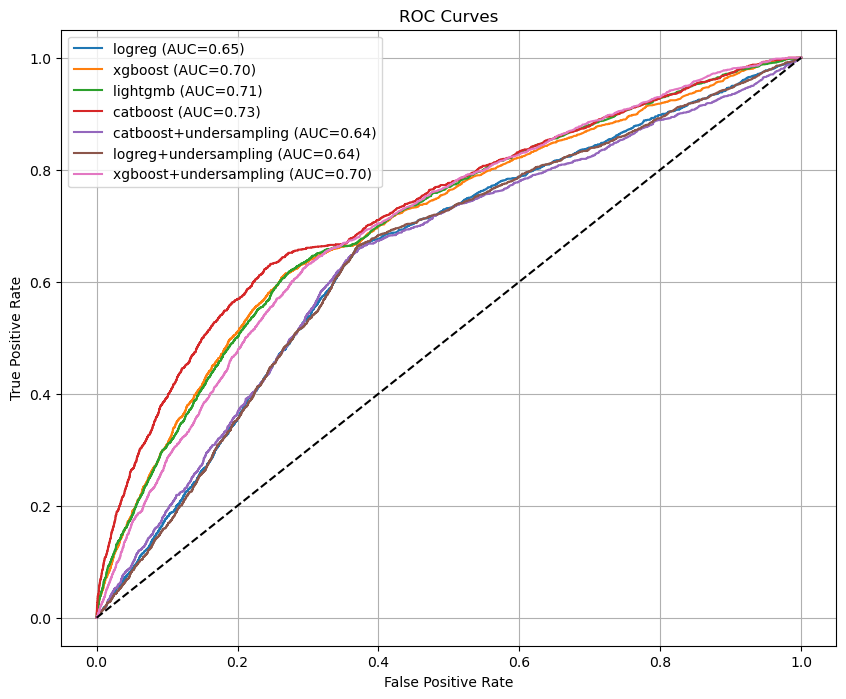

,model,threshold,recall,precision,f1,auc
6,xgboost+undersampling,0.5,1.000000,0.039613,0.076207,0.700700
5,logreg+undersampling,0.5,0.666854,0.068017,0.123444,0.644423
0,logreg,0.5,0.664041,0.068593,0.124341,0.646603
2,lightgmb,0.5,0.663478,0.071377,0.128888,0.706658
3,catboost,0.5,0.662352,0.080232,0.143126,0.729171
1,xgboost,0.5,0.660101,0.073459,0.132206,0.703838
4,catboost+undersampling,0.5,0.645470,0.068806,0.124356,0.643465



================= logreg =================
Threshold: 0.50, Recall: 0.664, Precision: 0.069, F1: 0.124, AUC: 0.647
Confusion matrix:
[[27080 16023]
 [  597  1180]]
[!] SHAP not supported for logreg: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

================= xgboost =================
Threshold: 0.50, Recall: 0.660, Precision: 0.073, F1: 0.132, AUC: 0.704
Confusion matrix:
[[28308 14795]
 [  604  1173]]


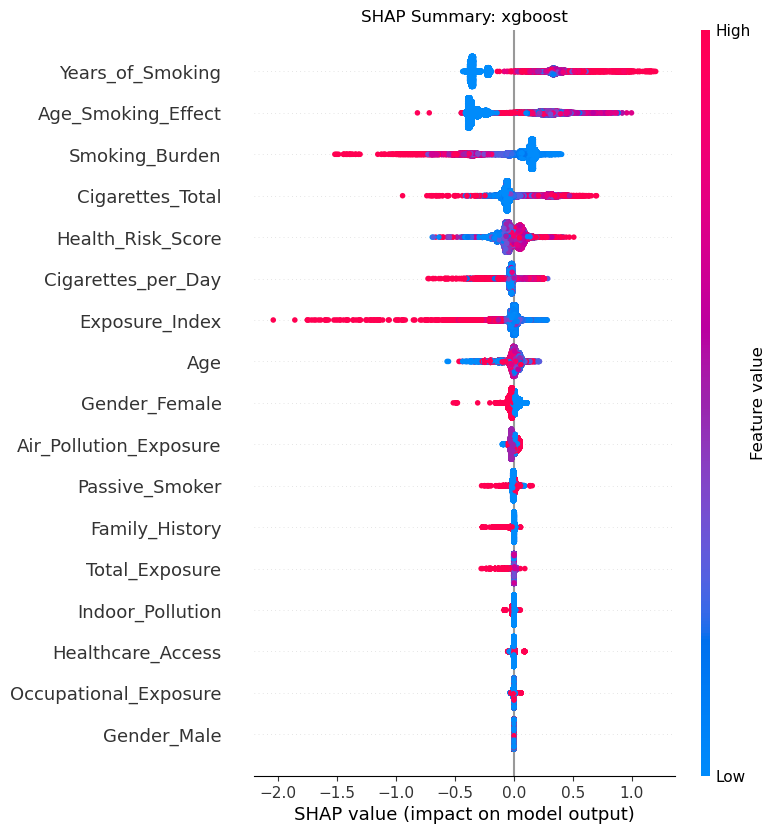


================= lightgmb =================
Threshold: 0.50, Recall: 0.663, Precision: 0.071, F1: 0.129, AUC: 0.707
Confusion matrix:
[[27764 15339]
 [  598  1179]]


c:\Users\66891\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


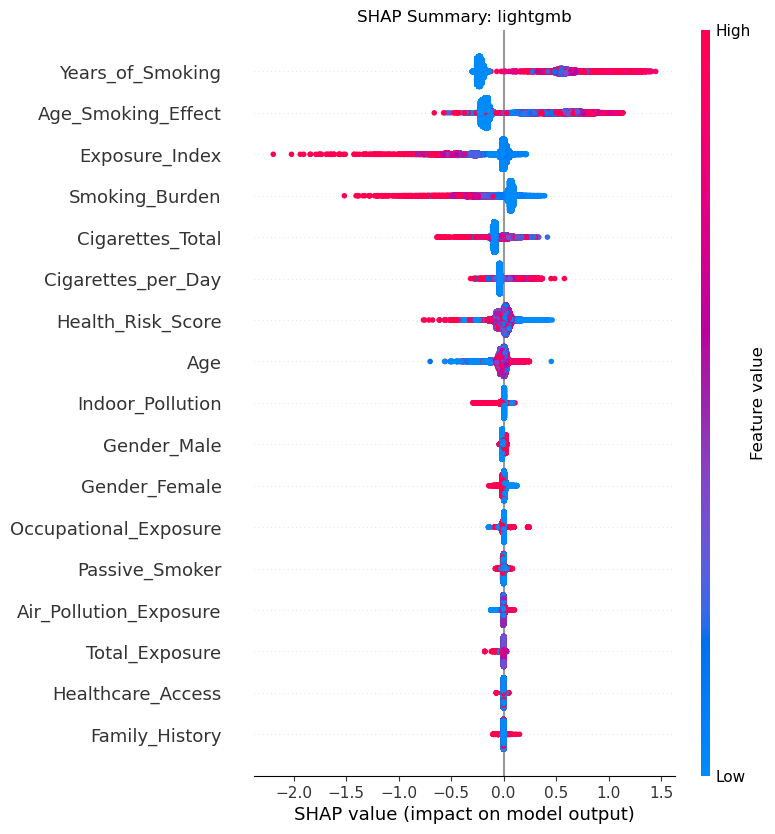


================= catboost =================
Threshold: 0.50, Recall: 0.662, Precision: 0.080, F1: 0.143, AUC: 0.729
Confusion matrix:
[[29610 13493]
 [  600  1177]]


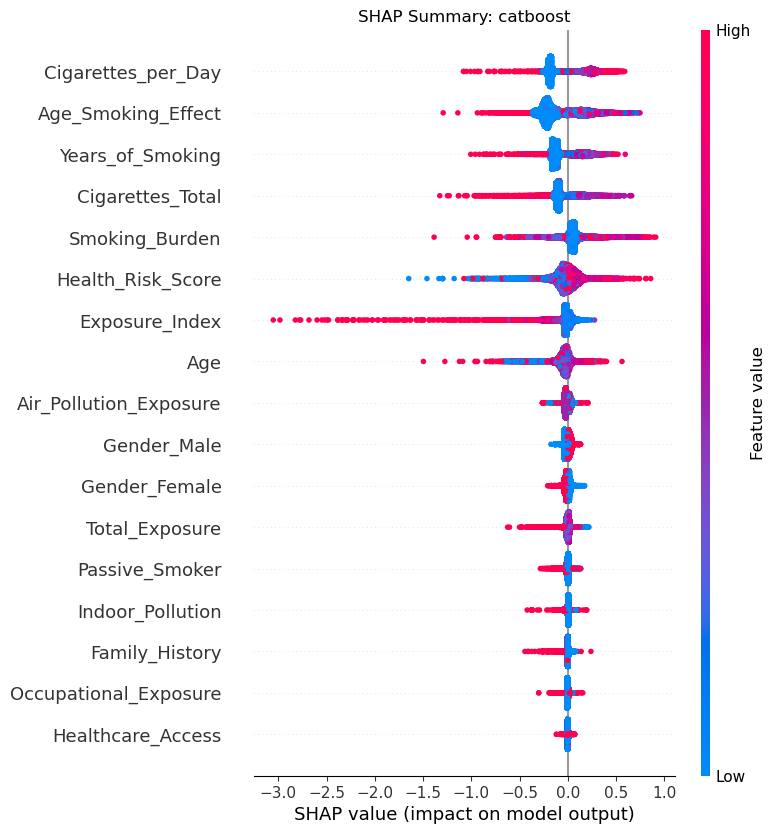


================= catboost+undersampling =================
Threshold: 0.50, Recall: 0.645, Precision: 0.069, F1: 0.124, AUC: 0.643
Confusion matrix:
[[27580 15523]
 [  630  1147]]


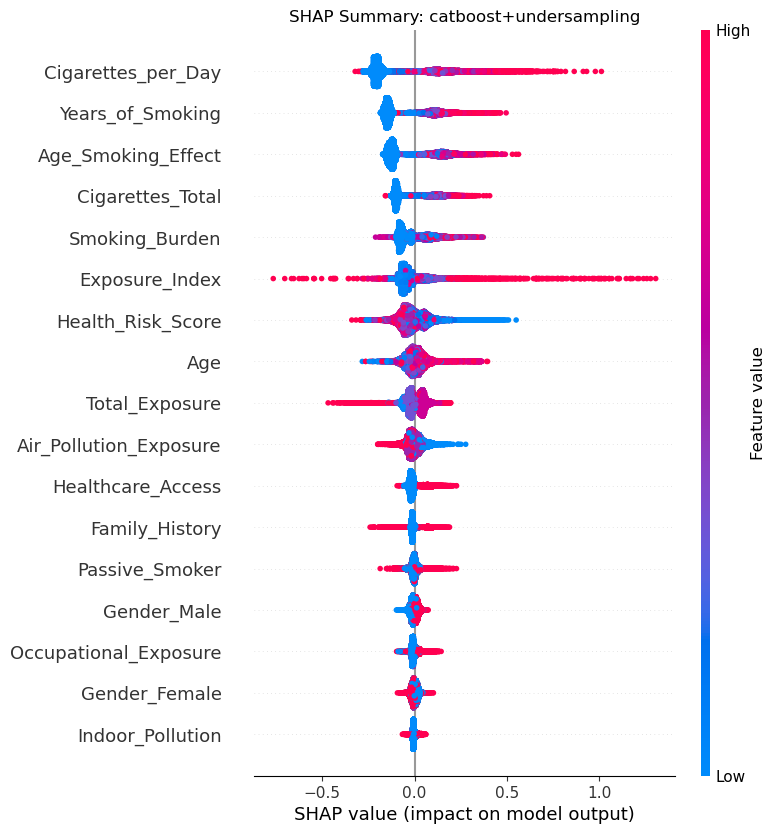


================= logreg+undersampling =================
Threshold: 0.50, Recall: 0.667, Precision: 0.068, F1: 0.123, AUC: 0.644
Confusion matrix:
[[26866 16237]
 [  592  1185]]
[!] SHAP not supported for logreg+undersampling: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

================= xgboost+undersampling =================
Threshold: 0.50, Recall: 1.000, Precision: 0.040, F1: 0.076, AUC: 0.701
Confusion matrix:
[[   21 43082]
 [    0  1777]]


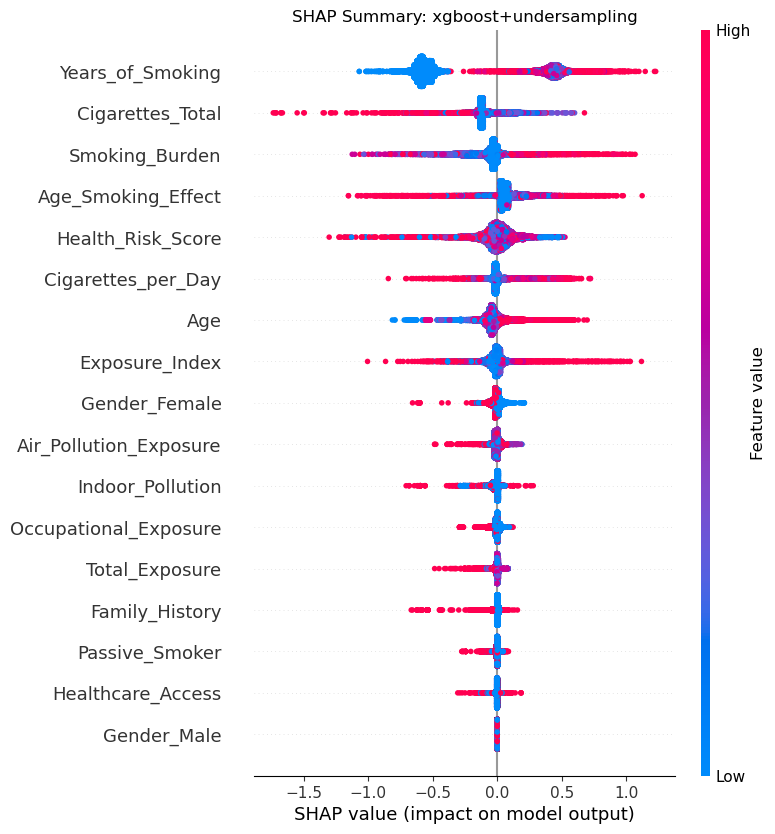


========= Interaktywny próg dla najlepszego modelu =========
Najlepszy model to: xgboost+undersampling


interactive(children=(FloatSlider(value=0.5, description='thresh', max=0.9, min=0.1, step=0.01), Output()), _d…

{'model': 'xgboost+undersampling', 'threshold': 0.5, 'recall': 1.0, 'precision': 0.03961300965246662, 'f1': 0.0762072218886697, 'auc': 0.7006998887419831, 'confusion_matrix': array([[   21, 43082],
       [    0,  1777]], dtype=int64), 'model_obj': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_paral

In [10]:
df = pd.read_csv('70_percent_ls.csv')
df.head()

# Zakładamy, że kolumna celu nazywa się:
target_column = 'Lung_Cancer_Diagnosis'

X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,        # zachowujemy proporcje klas!
    random_state=42
)




evaluate_models(
    models_paths=[
        "models/logreg.pkl",
        "models/xgboost.pkl",
        "models/lightgmb.pkl",
        "models/catboost.pkl",
        "models/catboost+undersampling.pkl",
        "models/logreg+undersampling.pkl",
        "models/xgboost+undersampling.pkl"

    ],
    X_test=X_test,
    y_test=y_test
)